<a href="https://colab.research.google.com/github/PunitRaveendran/ACM/blob/main/Phase-5%20Model%20Validation%20%26%20Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cross-Validated RMSE Scores: [4277.1730089  5387.61670454 5169.30288261 4961.83251607 4839.88315804]
Mean RMSE: 4927.161654029946


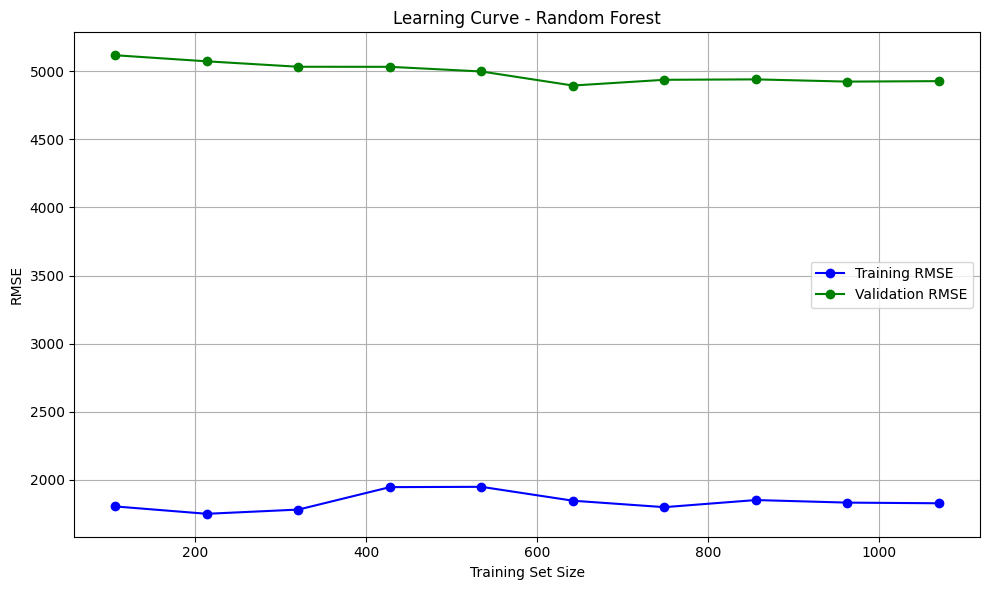

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve


# Loading dataset
df = pd.read_csv("/content/insurance.csv")

# Encode categorical features
le = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Model
model = RandomForestRegressor(n_estimators=200, random_state=25)

# KFold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=25)
cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
rmse_scores = np.sqrt(-cv_scores)

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=kf, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=25
)

print("Cross-Validated RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

# Compute average and std
train_rmse = np.sqrt(-train_scores)
test_rmse = np.sqrt(-test_scores)

train_mean = train_rmse.mean(axis=1)
test_mean = test_rmse.mean(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training RMSE')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation RMSE')
plt.title("Learning Curve - Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Underfitting is when both training and validation rmse are high, so it is too simple to capture pattern
# Overfitting is when training rmse is low but validation rmse is high so the model memorizes rather than generalizing it
# So in the idea model training and validation must be converging at low rmse

# With random forest there is low variance and non linearities are handled as well pretty well, overfitting can occur
# but the n_estimators and max depth will be handling them

